In [1]:
from IPython.display import display, Math, Latex
import math
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import pandas as pd
import random
import scipy.stats as stats
from scipy.special import comb as choose

In [2]:
def admissions_sim(num_students, num_schools, num_apps_per_student, num_accepted_per_school):
    student_ids = [student for student in range(num_students)]
    school_ids = [school for school in range(num_schools)]
    apps_matrix = np.zeros((num_students, num_schools))
    for student_id in student_ids:
      schools_applied_to = sorted(random.sample(school_ids, num_apps_per_student))
      student_apps = [1 if school in schools_applied_to else 0 for school in school_ids]
      apps_matrix[student_id,:] = student_apps  
    adm_decisions_matrix = np.zeros((num_students, num_schools))
    for school_id in school_ids:
      applicants =  [i for i, student in enumerate(apps_matrix[:,school_id]) if student == 1]
      students_accepted = set(random.sample(applicants, num_accepted_per_school)) 
      adm_decisions = [1 if student in students_accepted else 0 for student in student_ids]
      adm_decisions_matrix[:,school_id] = adm_decisions
    enrollment_matrix = np.zeros((num_students, num_schools))
    for student_id in student_ids:
      acceptances =  [i for i, school in enumerate(adm_decisions_matrix[student_id,:]) if school == 1]
      if acceptances:
        school_choice = random.choice(acceptances)
      else:
        school_choice = None
      enrollment_decision = [1 if school==school_choice else 0 for school in school_ids]
      enrollment_matrix[student_id,:] = enrollment_decision
    return apps_matrix, adm_decisions_matrix, enrollment_matrix

In [3]:
def prove(apps_matrix, adm_decisions_matrix, enrollment_matrix, print_output):
    total_applications = np.sum(apps_matrix)
    print "Total Students enrolled = " + str(np.sum(enrollment_matrix))
    school_outcomes = pd.DataFrame(index = school_ids, columns = ['applications', 'acceptances', 'matriculants', 'acceptance_rate', 'yield_rate'])
    school_outcomes['applications'] = np.sum(apps_matrix, axis = 0)
    school_outcomes['acceptances'] = np.sum(adm_decisions_matrix, axis = 0)
    school_outcomes['matriculants'] = np.sum(enrollment_matrix, axis = 0)
    school_outcomes['acceptance_rate'] = school_outcomes['acceptances']/school_outcomes['applications']
    school_outcomes['yield_rate'] = school_outcomes['matriculants']/school_outcomes['acceptances']
    avg_acceptance_rate = np.mean(school_outcomes['acceptance_rate'])
    avg_yield_rate = np.mean(school_outcomes['yield_rate'])
    if print_output:
        print '\n Formula 1 (p. 290): '
        display(Math(r'Average\ Acceptance\ Rate=\frac{ma}{nb}'))
        formula_1_result = float(num_schools*num_accepted_per_school)/(num_students*num_apps_per_student)
        print str("Derived Average Acceptance Rate = ") + str(formula_1_result)
        print "Simulated Average Acceptance Rate = " + str(avg_acceptance_rate)
        #by formula 4 (p. 291)
        prob_acceptance_per_school = formula_1_result
        prob = prob_acceptance_per_school
        print '\n Formula 10 (p. 292): '
        display(Math(r'Average\ Yield\ Rate='))
        display(Math(r'C_{ij}={\displaystyle {\displaystyle \sum_{y\in1,..,b\}}\frac{1}{y}P(i}}\ accepted\ at\ y-1\ other\;js)P(i\ rejected\ at\ b-y\ other\ js)\binom{b-1}{y-1}'))
        formula_10_result = 0
        for app in xrange(1, num_apps_per_student+1):
          app = float(app)
          formula_10_result = formula_10_result + (
                              choose((num_apps_per_student-1),(app-1)) * (
                              (1/app)*(prob**(app-1))*((1-prob)**(num_apps_per_student-app))))
        print str("Derived Average Yield Rate = ") + str(formula_10_result)
        print "Simulated Average Yield Rate = " + str(avg_yield_rate)
    return [avg_acceptance_rate, avg_yield_rate]

In [4]:
#example run
num_students = 100000
num_schools = 20
num_apps_per_student = 6
num_accepted_per_school = 10000
student_ids = range(num_students)
school_ids = range(num_schools)
apps, decisions, enrollment = admissions_sim(num_students, num_schools, num_apps_per_student, num_accepted_per_school)
prove(apps, decisions, enrollment, True)

Total Students enrolled = 91330.0

 Formula 1 (p. 290): 


<IPython.core.display.Math object>

Derived Average Acceptance Rate = 0.333333333333
Simulated Average Acceptance Rate = 0.333342453643

 Formula 10 (p. 292): 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Derived Average Yield Rate = 0.456104252401
Simulated Average Yield Rate = 0.45665


[0.33334245364338394, 0.45664999999999994]

In [5]:
paper_simulation_results = pd.DataFrame(index = range(5), columns = ['applications_per_student', 'avg_acceptance_rate', 'avg_yield_rate'])
i = 0
for num_apps_per_student in [3, 6, 9, 12, 15]:
    num_students = 100000
    num_schools = 20
    num_accepted_per_school = 10000
    apps, decisions, enrollment = admissions_sim(num_students, num_schools, num_apps_per_student, num_accepted_per_school)
    sim_results = prove(apps, decisions, enrollment, False)
    avg_acceptance_rate = sim_results[0]
    avg_yield_rate = sim_results[1]
    paper_simulation_results.ix[i] = [num_apps_per_student, avg_acceptance_rate, avg_yield_rate]
    i+=1
paper_simulation_results

Total Students enrolled = 96264.0
Total Students enrolled = 91164.0
Total Students enrolled = 89645.0
Total Students enrolled = 88666.0
Total Students enrolled = 88339.0


,applications_per_student,avg_acceptance_rate,avg_yield_rate
0,3,0.666694,0.48132
1,6,0.333341,0.45582
2,9,0.222225,0.448225
3,12,0.166667,0.44333
4,15,0.133334,0.441695


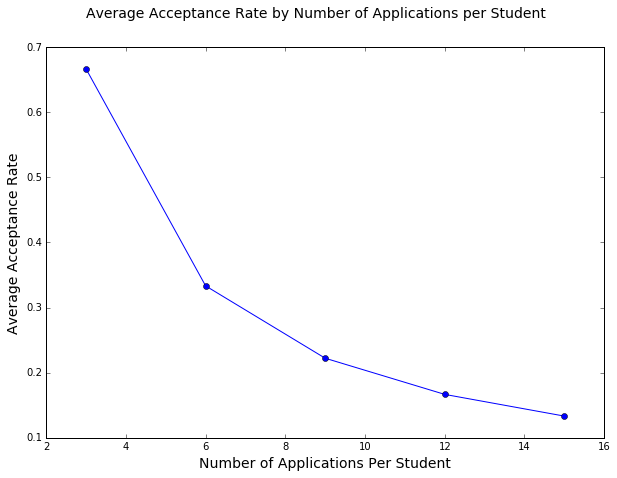

In [6]:
plt.figure(figsize=(10,7))
plt.plot(paper_simulation_results['applications_per_student'], paper_simulation_results['avg_acceptance_rate'], marker = 'o')
plt.suptitle('Average Acceptance Rate by Number of Applications per Student', fontsize=14)
plt.xlabel('Number of Applications Per Student',fontsize=14)
plt.ylabel('Average Acceptance Rate',fontsize=14)

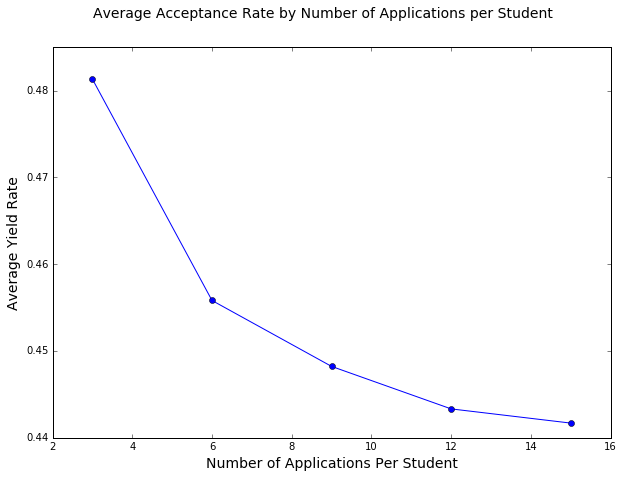

In [7]:
plt.figure(figsize=(10,7))
plt.plot(paper_simulation_results['applications_per_student'], paper_simulation_results['avg_yield_rate'], marker='o')
plt.suptitle('Average Acceptance Rate by Number of Applications per Student', fontsize=14)
plt.xlabel('Number of Applications Per Student',fontsize=14)
plt.ylabel('Average Yield Rate',fontsize=14)